In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


2025-07-23 16:33:27.313561: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-07-23 16:33:27.313713: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-07-23 16:33:27.313728: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-07-23 16:33:27.313921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-23 16:33:27.313938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not f

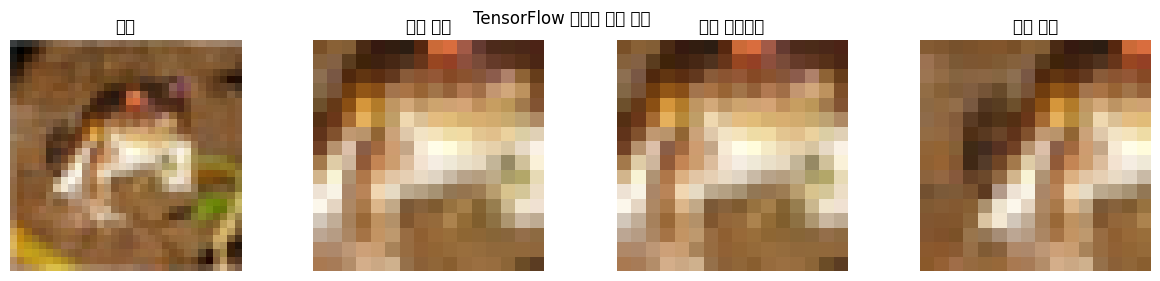

In [2]:


# CIFAR-10에서 샘플 이미지 한 장 가져오기
(x_train, _), _ = tf.keras.datasets.cifar10.load_data()
img = x_train[0]                    # (32, 32, 3)
img = tf.convert_to_tensor(img)

plt.figure(figsize=(15,3))

# 1. 원본 이미지 출력
plt.subplot(1,4,1)
plt.imshow(img.numpy().astype('uint8'))
plt.title('원본')
plt.axis('off')

# 2. 중앙 크롭 (중앙 16x16만 추출)
h, w = img.shape[0], img.shape[1]
crop1 = tf.image.central_crop(img, central_fraction=0.5)  # 중앙 50% 크롭
plt.subplot(1,4,2)
plt.imshow(crop1.numpy().astype('uint8'))
plt.title('중앙 크롭')
plt.axis('off')

# 3. 직접 좌상단 (10:26, 10:26) 사각형 크롭 (16x16)
crop2 = img[8:24, 8:24, :]
plt.subplot(1,4,3)
plt.imshow(crop2.numpy().astype('uint8'))
plt.title('직접 슬라이스')
plt.axis('off')

# 4. 랜덤 크롭 (무작위 16x16 영역)
crop3 = tf.image.random_crop(img, size=[16, 16, 3])
plt.subplot(1,4,4)
plt.imshow(crop3.numpy().astype('uint8'))
plt.title('랜덤 크롭')
plt.axis('off')

plt.suptitle("TensorFlow 이미지 크롭 실습")
plt.show()
